# Simulations of a Double Quantum Dot weakly measured by a Quantum Point Contact

See https://arxiv.org/abs/cond-mat/9909039

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.integrate import odeint
%matplotlib notebook
from ipywidgets import FloatProgress
from IPython.display import display

## Code

In [2]:
def SRK2(f,g,r0,tvals,nstrength = 1):
    '''
    Second order stochastic Runge-Kutta algorithm for integration of stochastic differential equations in Ito form:
    dr = f(r,t)*dt + g(r,t)*dW. (Modified for Bayesian equations).

    f: [Function taking and returning numpy arrays] Drift term of form f(r,t)
    g: [Function taking and returning numpy arrays] Diffusion term of form g(r,t)
    r0: [Array] Initial conditions
    tvals: [Array] Time values for which to obtain solution

    RETURNS: Solution matrix.
    '''

    r0 = np.array(r0)
    out = np.zeros((len(tvals),len(r0)))
    out[0] = r0
    
    for i in range(0,len(tvals) - 1, 1):
        dt = tvals[i + 1] - tvals[i]
        #dW = nstrength*np.random.normal(scale = np.sqrt(dt), size = len(r0))
        dW = nstrength*np.random.normal(scale = np.sqrt(dt), size = 1)
        
        rn = out[i]
        tn = tvals[i]
        
        
        rn_b = rn + np.multiply(f(rn,tn),dt)+ g(rn,tn)*dW
        rn_p = rn + np.multiply(f(rn,tn),dt) + g(rn,tn)*np.sqrt(dt)
        rn_m = rn + np.multiply(f(rn,tn),dt) - g(rn,tn)*np.sqrt(dt)
        
        tmp = np.add(f(rn_b,tn),f(rn,tn))
        
        term1 = (1/2)*np.multiply(tmp,dt)
        term2 = (1/4)*(g(rn_p,tn) + g(rn_b,tn) + 2*g(rn,tn))*dW
        term3 = (1/4)*(g(rn_p,tn) - g(rn_m,tn))*(dW**2 - dt)*(1/dt)**(1/2)
        
        out[i + 1] = rn + term1 + term2 + term3 
        
    return out

def f_bayQB(r,t,om=0,delI=0,SI=1,eps=1,gam=0):

    '''
    Deterministic Drift for Bayesian equations of motion of a Qubit with quantum point contact
    like measurement device in Ito form: (32)-(33) Korotkov 2000 with H = eps/2 and eps = om,
    https://arxiv.org/pdf/cond-mat/0008461.pdf.
    
    eps: [Float] Mixing Strength
    delI: [Float] Differenence between average current of detector when QB is in Up or down state.
    SI: [Float] Spectral density of current noise.
    om: [Float] Energy asymmettry. 
    gam: [Float] Dephasing rate.
    
    r[0]:p11, r[1]:p22, r[2]:p12.real ,r[3]:p12.imag
    '''
    
    tmp1 = - eps*r[3]
    tmp2 = 1j*om*(r[2]+1j*r[3]) + 1j*(eps/2)*(r[0] - r[1]) - (gam + (delI**2)/(4*SI))*(r[2]+1j*r[3]) 
    
    return np.array([tmp1,-tmp1,tmp2.real,tmp2.imag])

def g_bayQB(r,t,om=0,delI=0,SI=1,eps=1,gam=0):

    '''
    Noise term for Bayesian equations of motion of a Qubit with quantum point contact
    like measurement device in Ito form: (32)-(33) Korotkov 2000 with H = eps/2 and eps = om,
    https://arxiv.org/pdf/cond-mat/0008461.pdf.
    
    eps: [Float] Mixing Strength
    delI: [Float] Differenence between average current of detector when QB is in Up or down state.
    SI: [Float] Spectral density of current noise.
    om: [Float] Energy asymmettry. 
    gam: [Float] Dephasing rate.
    
    r[0]:p11, r[1]:p22, r[2]:p12.real ,r[3]:p12.imag
    '''
    
    tmp1 = 2*r[0]*r[1]*(delI/SI)
    tmp2 = - (r[0] - r[1])*(delI/SI)*(r[2]+1j*r[3])
    
    return np.array([tmp1,-tmp1,tmp2.real,tmp2.imag])

## Coupling Strength

$$ \mathcal{C} = \frac{2 \Delta I ^{2}}{S \epsilon}. $$

In [5]:
'''
C = 0
'''
# Parameters
def fcust(r,t):
    return f_bayQB(r,t,om=0,delI=0,SI=1,eps=1,gam=0)
def gcust(r,t):
    return g_bayQB(r,t,om=0,delI=0,SI=1,eps=1,gam=0)
# Intitial density matrix 
z = 1
r0 = np.array([0.5*(1+z),0.5*(1-z),0.0,0.0])
# Time values
tvals = np.linspace(0,15,50000)
# Simulation
traj1= SRK2(fcust,gcust,r0,tvals)
# Simulation array --> Plotting array 
trajplt1= np.transpose(traj1)

'''
C = 0.25
'''
# Parameters
def fcust(r,t):
    return f_bayQB(r,t,om=0,delI=0.5,SI=1,eps=1,gam=0)
def gcust(r,t):
    return g_bayQB(r,t,om=0,delI=0.5,SI=1,eps=1,gam=0)
# Intitial density matrix 
z = 1
r0 = np.array([0.5*(1+z),0.5*(1-z),0.0,0.0])
# Time values
tvals = np.linspace(0,15,50000)
# Simulation
traj2= SRK2(fcust,gcust,r0,tvals)
# Simulation array --> Plotting array 
trajplt2= np.transpose(traj2)

'''
C = 9
'''
# Parameters
def fcust(r,t):
    return f_bayQB(r,t,om=0,delI=4,SI=1,eps=1,gam=0)
def gcust(r,t):
    return g_bayQB(r,t,om=0,delI=4,SI=1,eps=1,gam=0)
# Intitial density matrix 
z = 1
r0 = np.array([0.5*(1+z),0.5*(1-z),0.0,0.0])
# Time values
tvals = np.linspace(0,15,50000)
# Simulation
traj3= SRK2(fcust,gcust,r0,tvals)
# Simulation array --> Plotting array 
trajplt3= np.transpose(traj3)



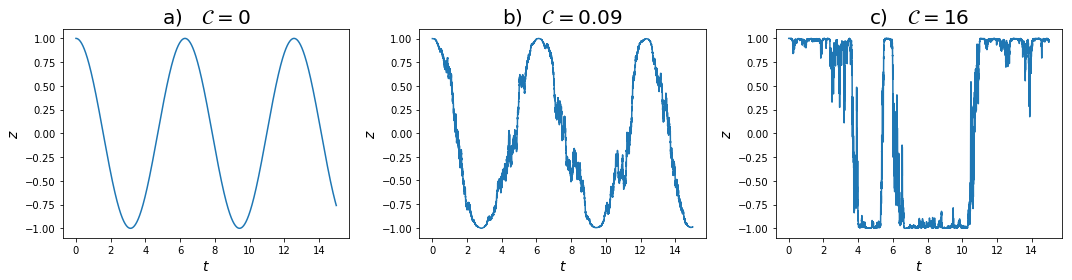

In [6]:
# Values to plot
zlist1 = trajplt1[0] - trajplt1[1]  
zlist2 = trajplt2[0] - trajplt2[1]  
zlist3 = trajplt3[0] - trajplt3[1]  

# Plotting (Sub-plots)
%matplotlib inline
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
ax1.plot(tvals, zlist1)
ax1.set_title(r'a)$\quad \mathcal{C} = 0$',size= 20)
ax1.set_xlabel(r'$t$',fontsize = 14)
ax1.set_ylabel(r'$z$',fontsize = 14)

ax2 = fig.add_subplot(132)
ax2.plot(tvals, zlist2)
ax2.set_title(r'b)$\quad \mathcal{C} = 0.09$',size= 20)
ax2.set_xlabel(r'$t$',fontsize = 14)
ax2.set_ylabel(r'$z$',fontsize = 14)

ax3 = fig.add_subplot(133)
ax3.plot(tvals, zlist3)
ax3.set_title(r'c)$\quad \mathcal{C} = 16$',size= 20)
ax3.set_xlabel(r'$t$',fontsize = 14)
ax3.set_ylabel(r'$z$',fontsize = 14)

plt.tight_layout()

#fig.savefig('coupling.png',dpi = 400)

### Purification 

In [57]:
'''
Purification
'''
# Parameters
def fcust(r,t):
    return f_bayQB(r,t,om=0,delI=0.1,SI=1,eps=1,gam=0)
def gcust(r,t):
    return g_bayQB(r,t,om=0,delI=0.1,SI=1,eps=1,gam=0)
# Intitial density matrix 
z = 1
r0 = np.array([0.5*(1+z),0.5*(1-z),0.0,0.0])
# Time values
tvals = np.linspace(0,5,2000)
# Simulation
traj = SRK2(fcust,gcust,r0,tvals)
# Simulation array --> Plotting array 
trajplt = np.transpose(traj)

In [60]:
'''
Purification part 2
'''
# Parameters
def fcust(r,t):
    return f_bayQB(r,t,om=0,delI=1,SI=1,eps=1,gam=0)
def gcust(r,t):
    return g_bayQB(r,t,om=0,delI=1,SI=1,eps=1,gam=0)
# Intitial density matrix 
z = 0
r0 = np.array([0.5*(1+z),0.5*(1-z),0.0,0.0])
# Time values
tvals = np.linspace(0,5,2000)
# Simulation
traj1 = SRK2(fcust,gcust,r0,tvals)
# Simulation array --> Plotting array 
trajplt1 = np.transpose(traj1)

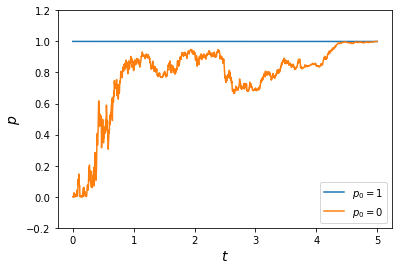

In [63]:
xlist = trajplt[0] - trajplt[1]
ylist = 2*trajplt[2]
zlist = 2*trajplt[3]
plist = xlist**2 + ylist**2 + zlist**2

xlist1 = trajplt1[0] - trajplt1[1]
ylist1 = 2*trajplt1[2]
zlist1 = 2*trajplt1[3]
plist1 = xlist1**2 + ylist1**2 + zlist1**2

plt.plot(tvals,plist,label = r'$p_{0}=1$' )
plt.plot(tvals,plist1,label = r'$p_{0}=0$')
plt.xlabel(r'$t$', fontsize = 14)
plt.ylabel(r'$p$', fontsize = 14)
plt.ylim([-0.2,1.2])
plt.legend()

#plt.savefig('puripic.png',dpi = 500)

###  Decoherence 

In [3]:
'''
Decoherence
'''
# Parameters
def fcust(r,t):
    return f_bayQB(r,t,om=0,delI=0.7,SI=1,eps=1,gam=0)
def gcust(r,t):
    return g_bayQB(r,t,om=0,delI=0.7,SI=1,eps=1,gam=0)
# Initial density matrix 
z = 1.0
r0 = np.array([0.5*(1+z),0.5*(1-z),0.0,0.0])
# Time values
tvals = np.linspace(0,15,15000)

# Average trajectorys

trajlist = []
badlist = []
f = FloatProgress(min = 0, max = 1100)
display(f)
for i in range(1050):
    f.value += 1
    a = np.array(SRK2(fcust,gcust,r0,tvals))
    
    # Test to see if it crashed 
    itcrashed  = 0
    for i in range(len(a)):
        for j in range(len(a[i])):
            if type(a[i][j]) != np.float64 :
                itcrashed = 1
                print(type(a[i][j]))
    if itcrashed == 0:  
        trajlist.append(a)
    else:
        badlist.append(a)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:79: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:80: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: RuntimeWarning: invalid value encountered in cdouble_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:80: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: invalid value encountered in subtract


In [24]:
'''
Checking for large but not 'None' numbers. 
'''
trajlist2 = []
badlist2 = []
for i in range(len(trajlist)):
    a = trajlist[i]
    # Test to see if it crashed 
    itcrashed  = 0
    for i in range(len(a)):
        for j in range(len(a[i])):
            if type(a[i][j]) != np.float64 or abs(a[i][j]) > 10:
                itcrashed = 1
    if itcrashed == 0:  
        trajlist2.append(a)
    else:
        badlist2.append(a)

In [36]:
traj1 = trajlist2[0]

traj5 = traj1
for i in range(4):
    traj5 = traj5 + trajlist2[i+1]

traj10 = traj1
for i in range(9):
    traj10 = traj10 + trajlist2[i+1]

traj100 = traj1
for i in range(99):
    traj100 = traj100 + trajlist2[i+1]
    
traj1000 = traj1
for i in range(999):
    traj1000 = traj1000 + trajlist2[i+1]
     
tvals = np.linspace(0,15,15000)
trajplt1 = np.transpose(traj1)
trajplt5 = (1/5)*np.transpose(traj5)
trajplt10 = (1/10)*np.transpose(traj10)
trajplt100 = (1/100)*np.transpose(traj100)
trajplt1000 = (1/1000)*np.transpose(traj1000)

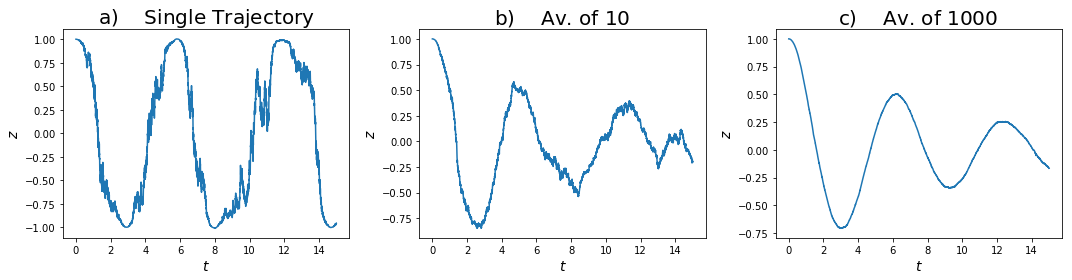

In [39]:
%matplotlib inline

# Values to plot
zlist1 = trajplt1[0] - trajplt1[1]  
zlist2 = trajplt10[0] - trajplt10[1]  
zlist3 = trajplt1000[0] - trajplt1000[1]  

# Plotting (Sub-plots)

fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
ax1.plot(tvals, zlist1)
ax1.set_title(r'a)$\quad$ Single Trajectory',size= 20)
ax1.set_xlabel(r'$t$',fontsize = 14)
ax1.set_ylabel(r'$z$',fontsize = 14)

ax2 = fig.add_subplot(132)
ax2.plot(tvals, zlist2)
ax2.set_title(r'b)$\quad$ Av. of 10 ',size= 20)
ax2.set_xlabel(r'$t$',fontsize = 14)
ax2.set_ylabel(r'$z$',fontsize = 14)

ax3 = fig.add_subplot(133)
ax3.plot(tvals, zlist3)
ax3.set_title(r'c)$\quad$ Av. of 1000 ',size= 20)
ax3.set_xlabel(r'$t$',fontsize = 14)
ax3.set_ylabel(r'$z$',fontsize = 14)

plt.tight_layout()

#plt.savefig('decohpic2.png',dpi = 500)